# inne funkcje aktywacji


In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# load datasets

data_dir = Path("data")
multimodal_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv")
multimodal_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv")
steps_train = pd.read_csv(data_dir / "regression" / "steps-large-training.csv")
steps_test = pd.read_csv(data_dir / "regression" / "steps-large-test.csv")
rings3_train = pd.read_csv(data_dir / "classification" / "rings3-regular-training.csv")
rings5_train = pd.read_csv(data_dir / "classification" / "rings5-regular-training.csv")
rings3_test = pd.read_csv(data_dir / "classification" / "rings3-regular-test.csv")
rings5_test = pd.read_csv(data_dir / "classification" / "rings5-regular-test.csv")

# multimodal

In [3]:
def layers(activation_type, num_layers = 1, neurons = 5, output_type="regression", output_dim=1):
    activation_output = "linear" if output_type == "regression" else "softmax"
    return [
        {"output_dim": neurons, "activation": activation_type, "init": "xavier"}
    ] * num_layers + [
        {"output_dim": output_dim, "output_type": output_type, "activation": activation_output, "init": "normal"}
    ]

norm = networks.assets.Normalizator(multimodal_train)
train = norm(multimodal_train)
test = norm(multimodal_test)

In [4]:
train[["x"]].to_numpy().T.shape

(1, 10000)

In [5]:
activations = ["linear", "tanh", "relu", "sigmoid"]
num_layers = [1, 2, 3]
num_neurons = [2, 5, 10]
max_epochs = 500


MSE for 1 layer and linear activation: 90.24444835762677


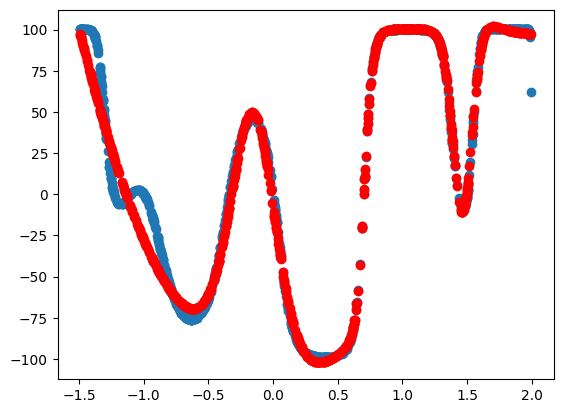

In [6]:


mlp = networks.MLP(layers(activations[1], num_layers[2]), input=train[["x"]].T)
losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=0.01, plot_losses=False, verbose=False)

y_hat = mlp.predict(test[["x"]].to_numpy().T)
plt.scatter(multimodal_test["x"], multimodal_test["y"])
plt.scatter(multimodal_test["x"], norm.denorm(y_hat.T, index="y"), color="red")
print("MSE for 1 layer and linear activation:", np.mean((multimodal_test[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))


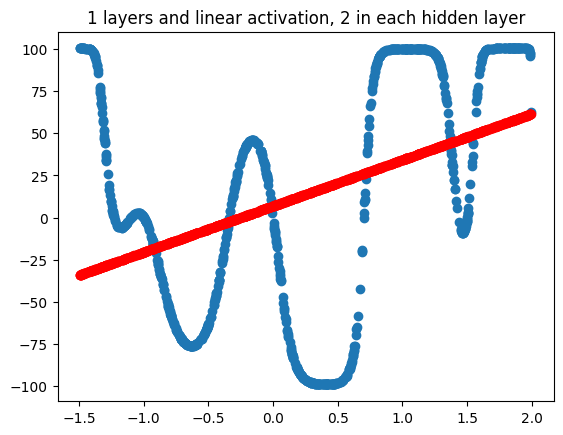

MSE for 1 layers and linear activation: 4434.007105837775


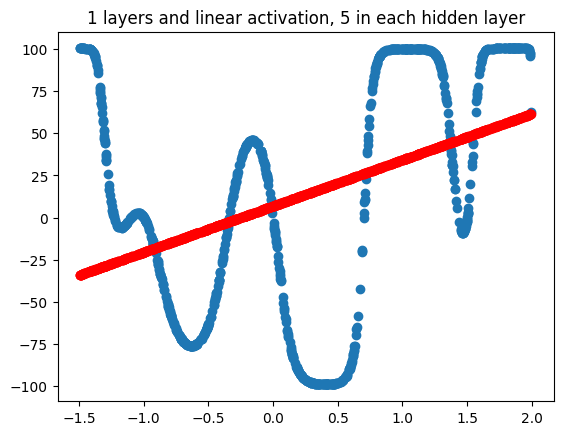

MSE for 1 layers and linear activation: 4434.034984182386


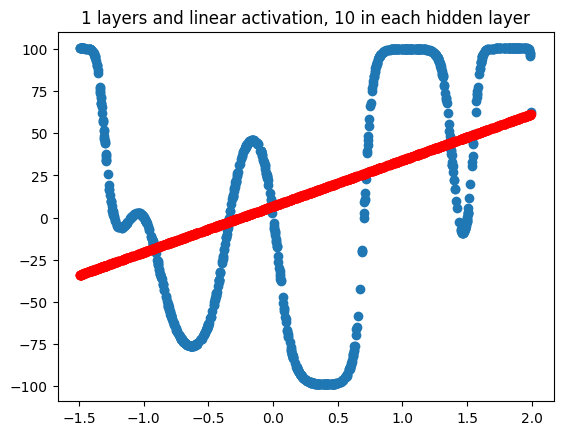

MSE for 1 layers and linear activation: 4434.159609777905


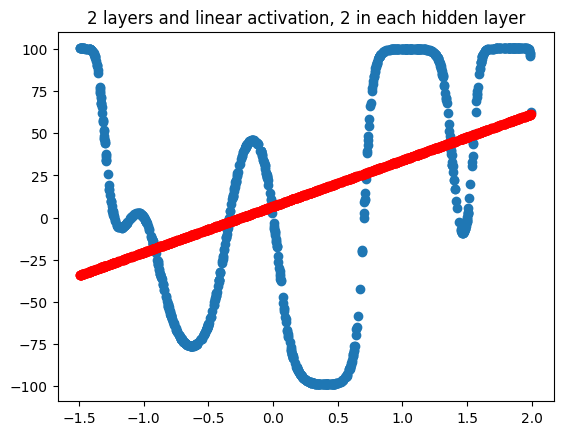

MSE for 2 layers and linear activation: 4434.2176909211985


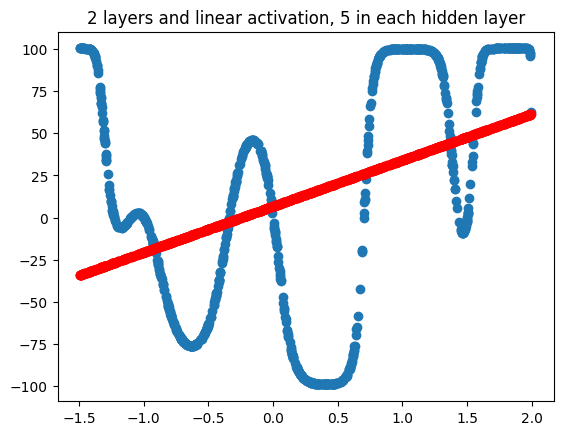

MSE for 2 layers and linear activation: 4434.153840484817


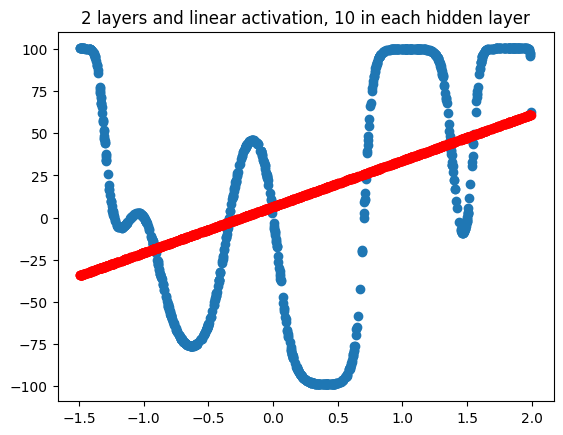

MSE for 2 layers and linear activation: 4434.590160327217


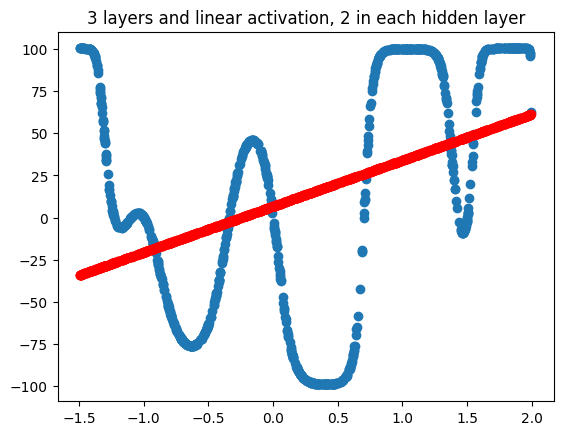

MSE for 3 layers and linear activation: 4434.249931511581


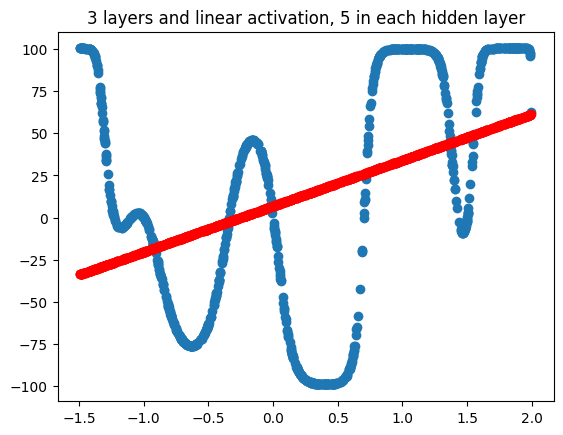

MSE for 3 layers and linear activation: 4434.194979364285


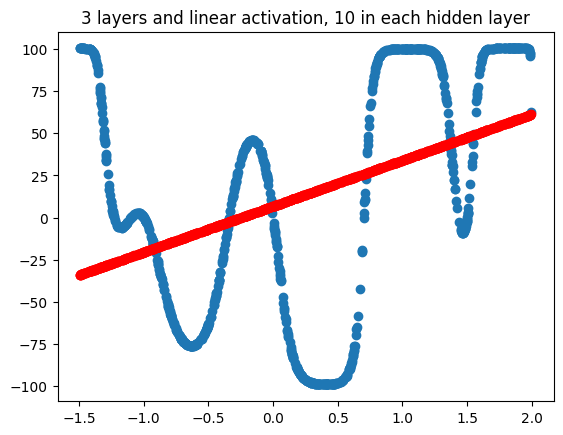

MSE for 3 layers and linear activation: 4434.268248551865


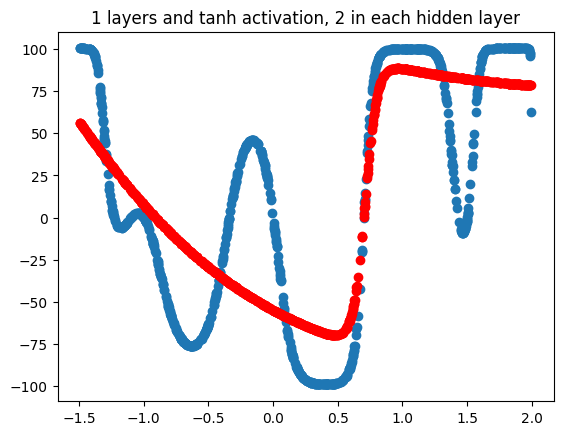

MSE for 1 layers and tanh activation: 1662.7552904087202


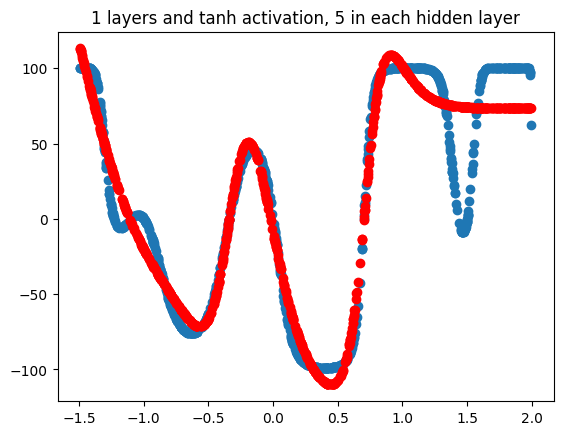

MSE for 1 layers and tanh activation: 436.74063348367565


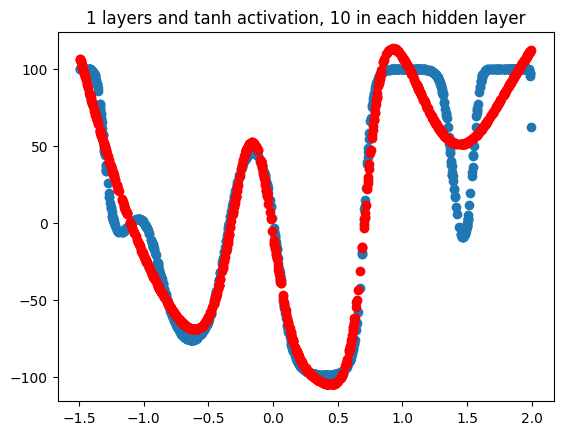

MSE for 1 layers and tanh activation: 298.2976986884264


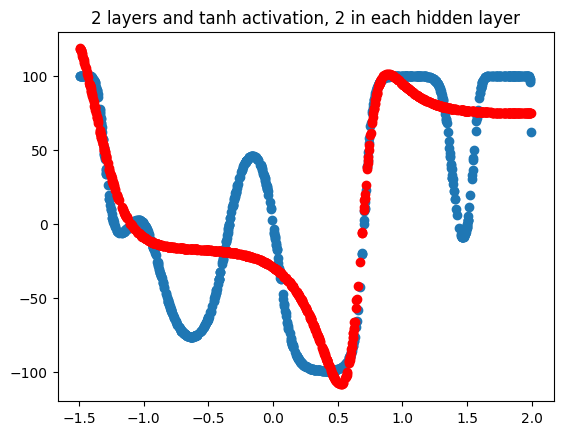

MSE for 2 layers and tanh activation: 1141.088590028008


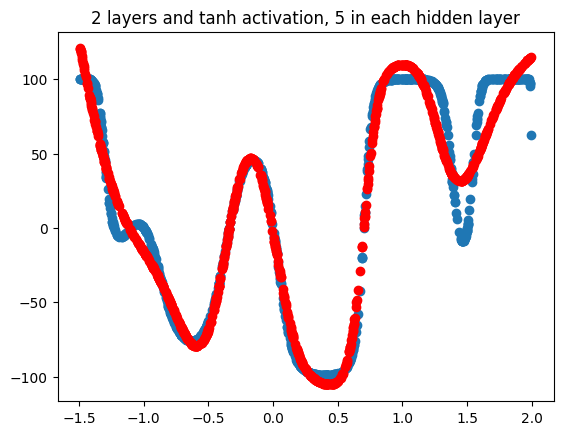

MSE for 2 layers and tanh activation: 205.77678512835084


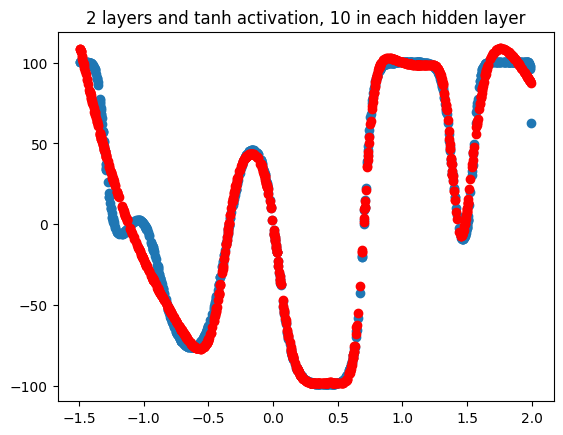

MSE for 2 layers and tanh activation: 71.38783619290092


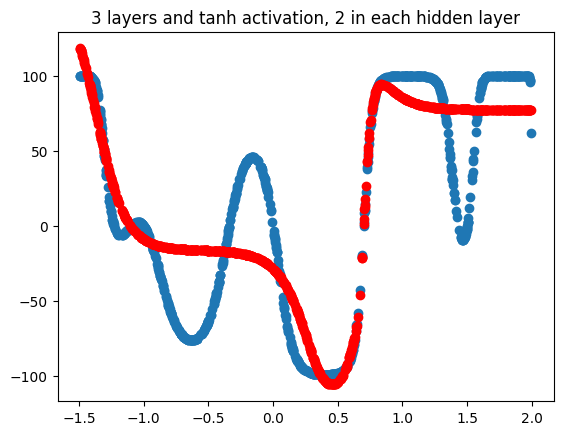

MSE for 3 layers and tanh activation: 1081.6416199511993


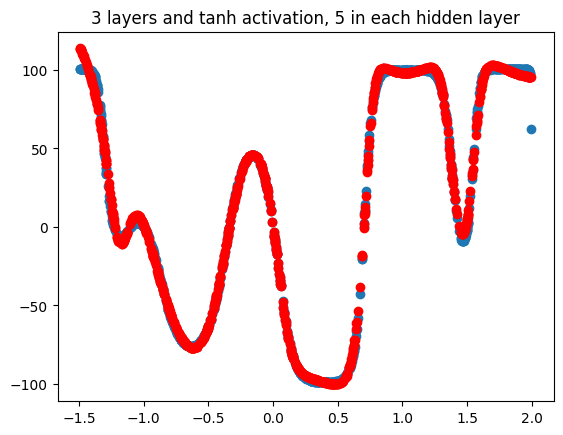

MSE for 3 layers and tanh activation: 10.733382948157304


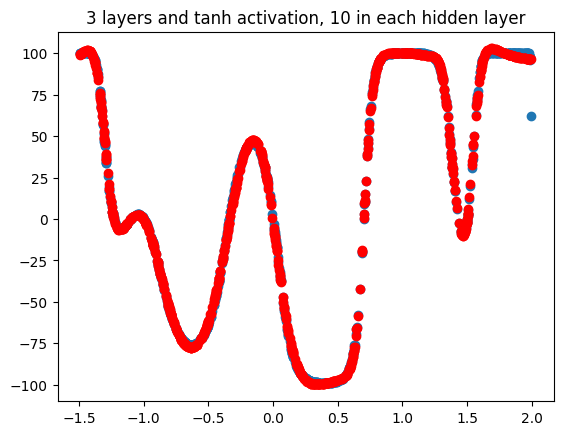

MSE for 3 layers and tanh activation: 2.731828149161081


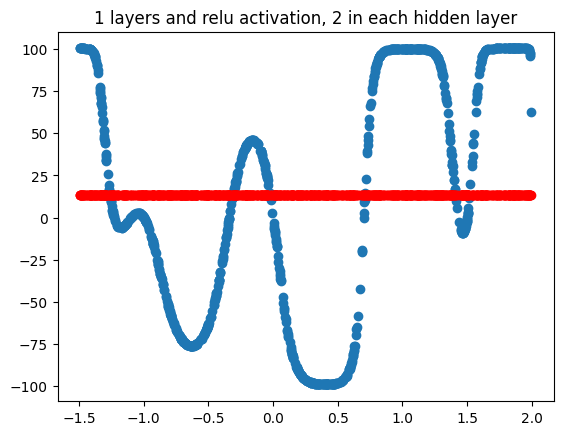

MSE for 1 layers and relu activation: 5221.490685553494


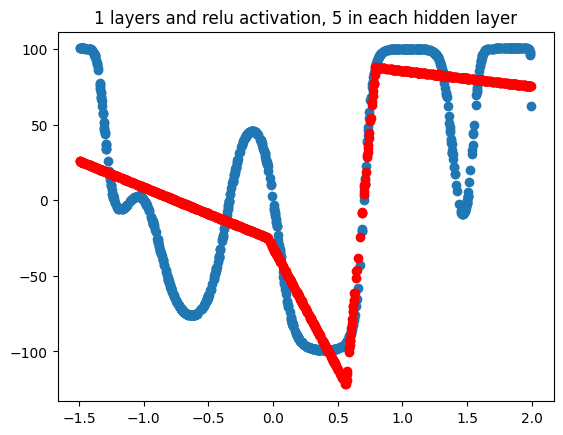

MSE for 1 layers and relu activation: 1586.8633527548466


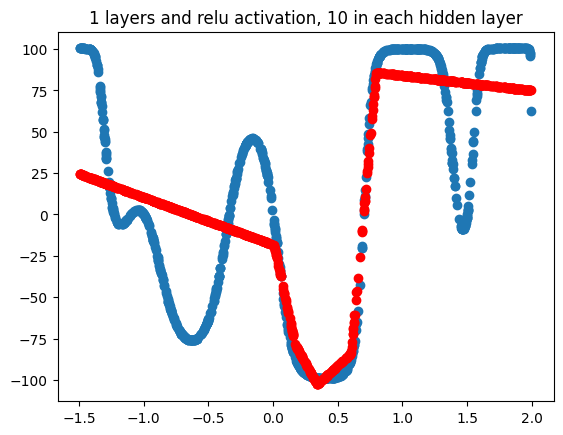

MSE for 1 layers and relu activation: 1554.982764683512


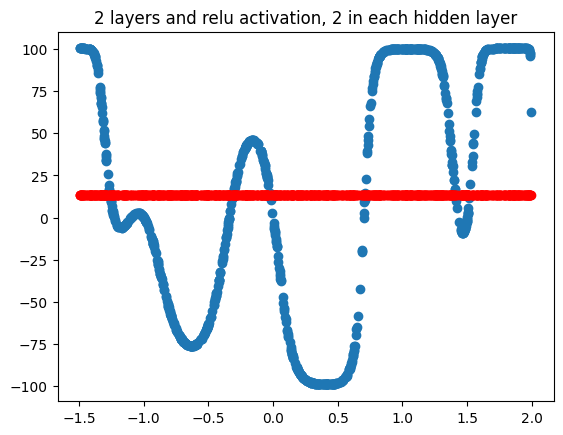

MSE for 2 layers and relu activation: 5221.490685598154


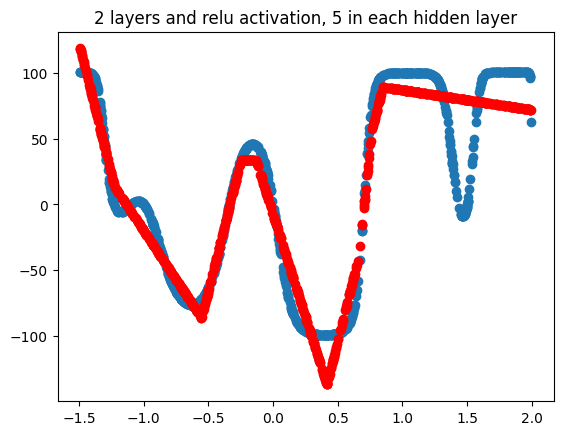

MSE for 2 layers and relu activation: 536.5859474688112


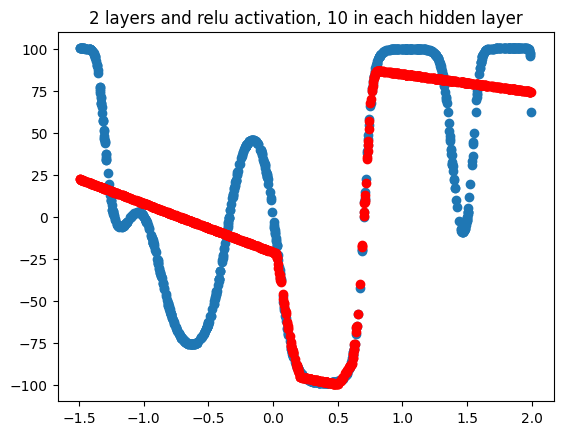

MSE for 2 layers and relu activation: 1533.9743952182662


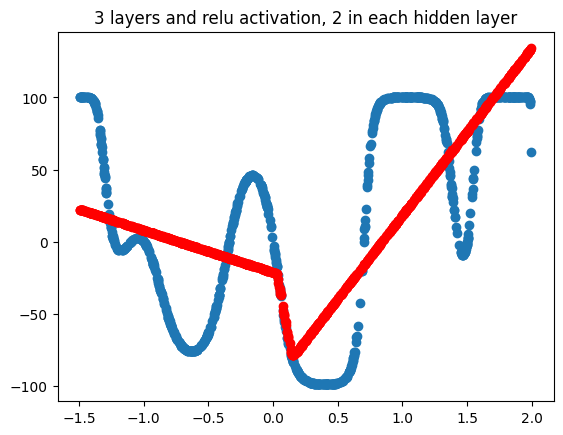

MSE for 3 layers and relu activation: 2677.6686575009303


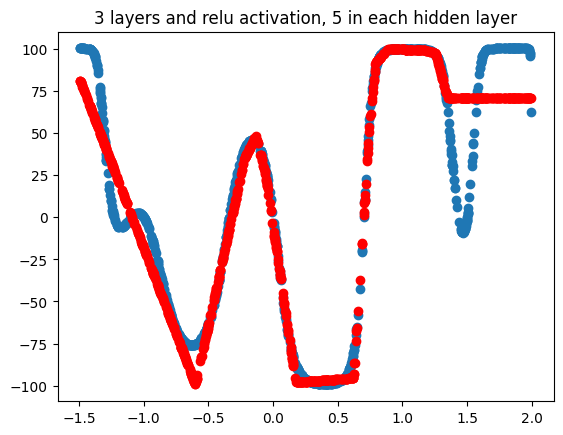

MSE for 3 layers and relu activation: 430.33245306894474


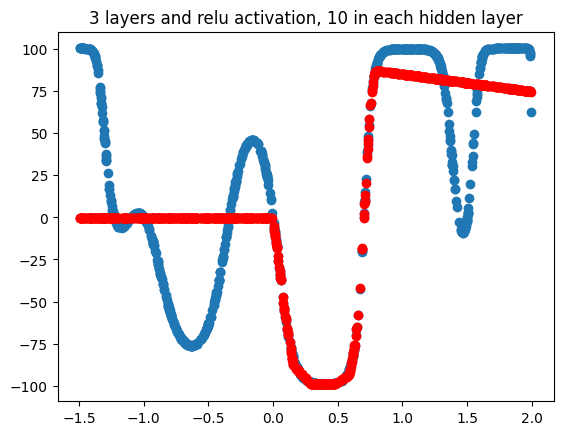

MSE for 3 layers and relu activation: 1648.8862425462014


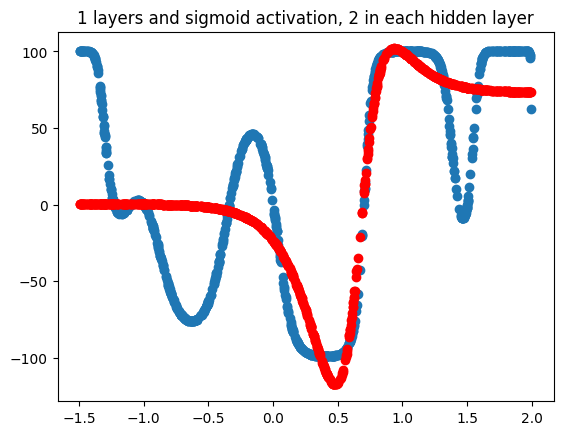

MSE for 1 layers and sigmoid activation: 1765.8397336203973


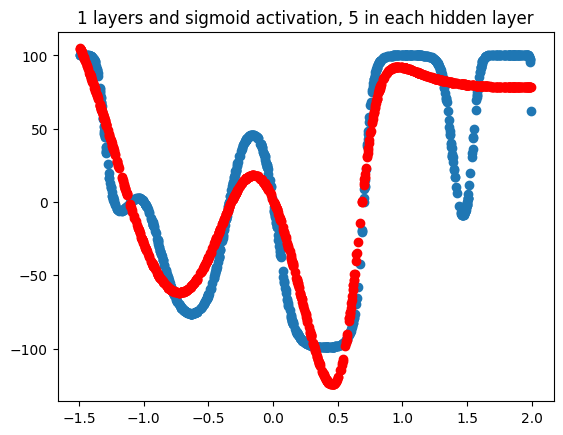

MSE for 1 layers and sigmoid activation: 656.7058610773571


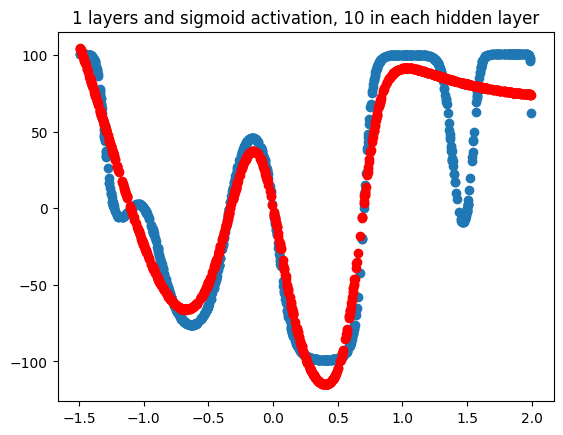

MSE for 1 layers and sigmoid activation: 551.0491912510845


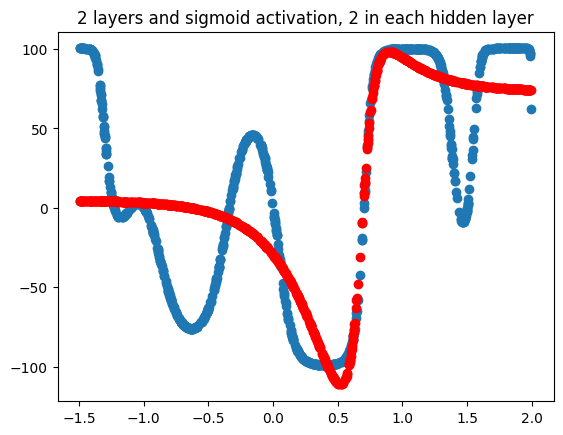

MSE for 2 layers and sigmoid activation: 1774.1502415547209


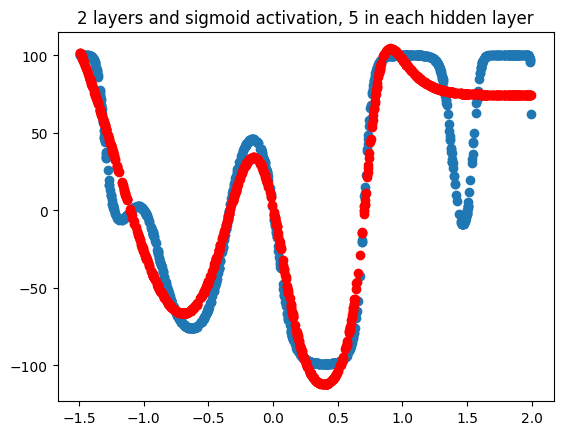

MSE for 2 layers and sigmoid activation: 493.77675195072106


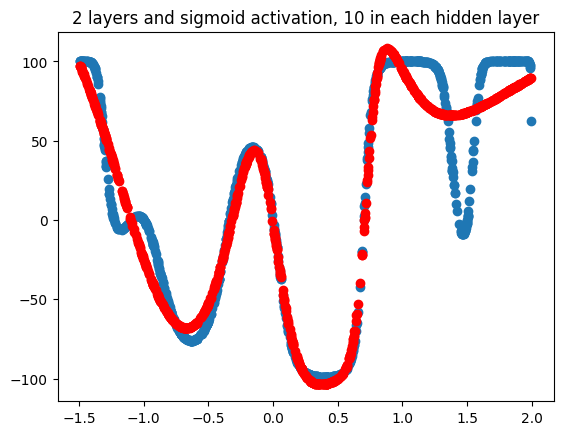

MSE for 2 layers and sigmoid activation: 395.7198472299952


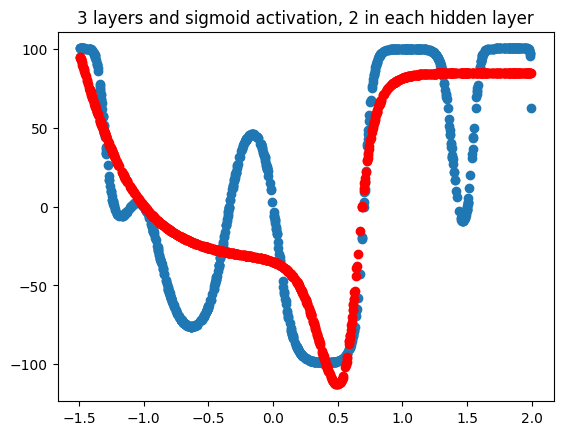

MSE for 3 layers and sigmoid activation: 1295.7861497403867


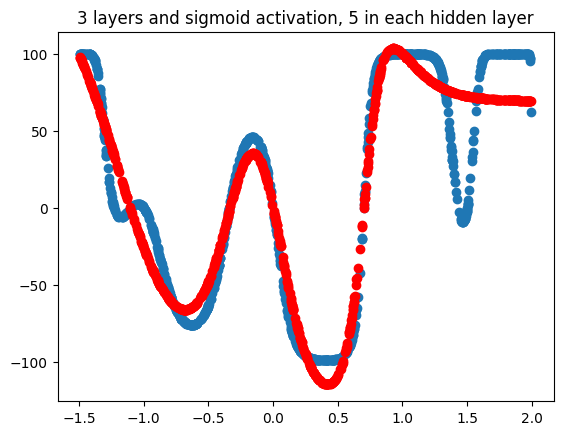

MSE for 3 layers and sigmoid activation: 498.2526681955357


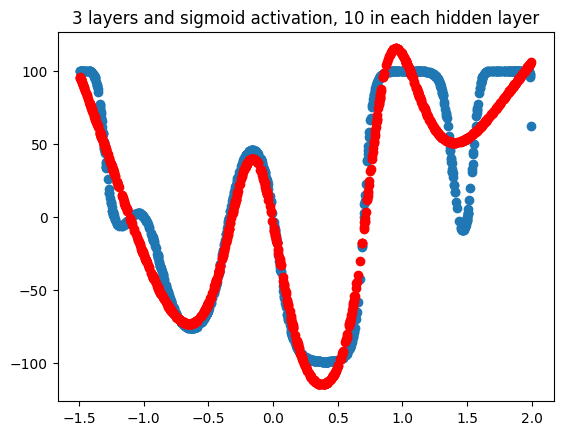

MSE for 3 layers and sigmoid activation: 381.24800238715216


In [9]:
for activation in activations:
    for num_layer in num_layers:
        for neurons in num_neurons:
            mlp = networks.MLP(layers(activation, num_layer, neurons), input=train[["x"]].T, verbose=False)
            losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=0.01, plot_losses=False, verbose=False)

            y_hat = mlp.predict(test[["x"]].to_numpy().T)
            plt.scatter(multimodal_test["x"], multimodal_test["y"])
            plt.scatter(multimodal_test["x"], norm.denorm(y_hat.T, index="y"), color="red")
            plt.title(f"{num_layer} layers and {activation} activation, {neurons} in each hidden layer")
            plt.show()
            print(f"MSE for {num_layer} layers and {activation} activation:", np.mean((multimodal_test[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))

## wybór architektury
najlepsze okazały się archtektury z tanh oraz największą liczbą warstw i neuronów. Przetestujemy sieci z 3 warstwami, 10 neuronami na warstwe oraz z funkcją aktywacji tanh oraz relu

## regresja

In [10]:

norm = networks.assets.Normalizator(steps_train)
train = norm(steps_train)
test = norm(steps_test)

In [11]:
num_layer = 3
neurons = 10
activation = "relu"

In [12]:
max_epochs = 1000

In [13]:
learning_rates = [0.5, 0.1, 0.05, 0.001]

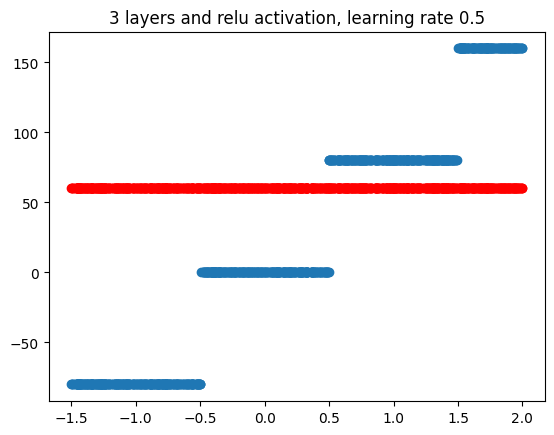

MSE for 3 layers and relu activation, 
learning rate 0.5: 8185.6


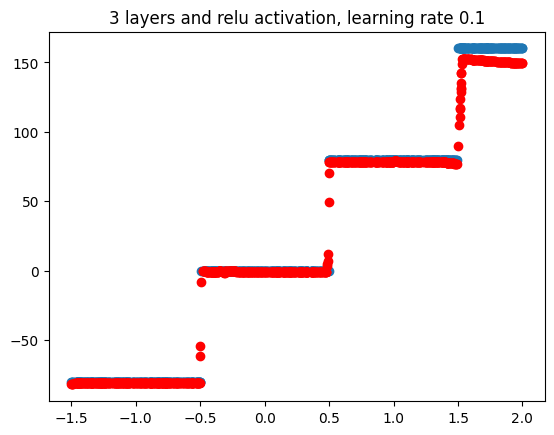

MSE for 3 layers and relu activation, 
learning rate 0.1: 35.583184971959696


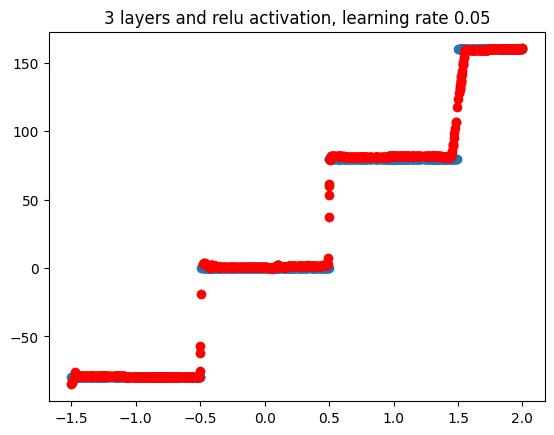

MSE for 3 layers and relu activation, 
learning rate 0.05: 19.549768609575555


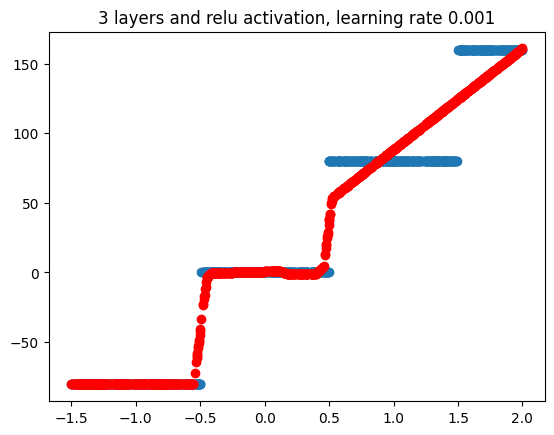

MSE for 3 layers and relu activation, 
learning rate 0.001: 241.08465948056016


In [14]:
activation = "relu"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons), input=train[["x"]].T, verbose=False)
    losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    y_hat = mlp.predict(test[["x"]].to_numpy().T)
    plt.scatter(steps_test["x"], steps_test["y"])
    plt.scatter(steps_test["x"], norm.denorm(y_hat.T, index="y"), color="red")
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print(f"MSE for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.mean((steps_test[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))

d:\studia\sem6\miowad\miowad\NN\networks\layers.py:166: RuntimeWarning: overflow encountered in matmul
  g = np.matmul(self.weights.T, self.dZ) # * self.activation_prime(self.get_linear_output())
d:\studia\sem6\miowad\miowad\NN\networks\layers.py:152: RuntimeWarning: invalid value encountered in multiply
  self.dZ = upstream_gradient * self.activation_prime(self.get_linear_output())


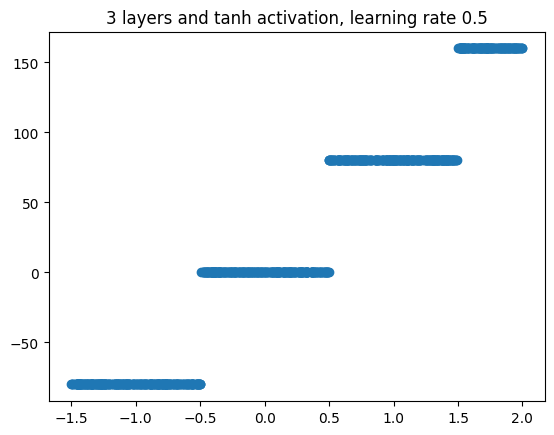

MSE for 3 layers and tanh activation, 
learning rate 0.5: nan


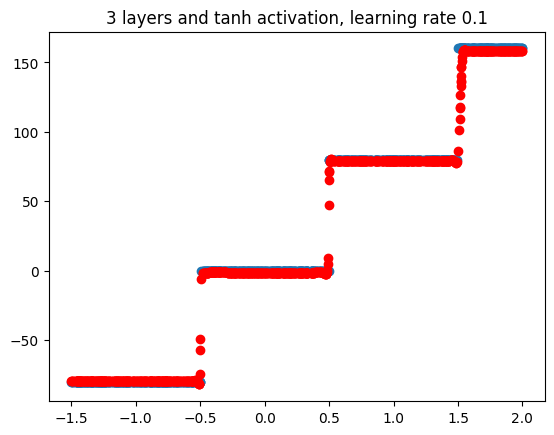

MSE for 3 layers and tanh activation, 
learning rate 0.1: 24.511529861663156


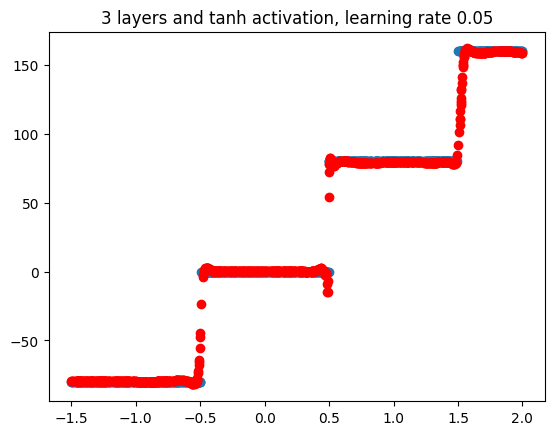

MSE for 3 layers and tanh activation, 
learning rate 0.05: 34.3605547224676


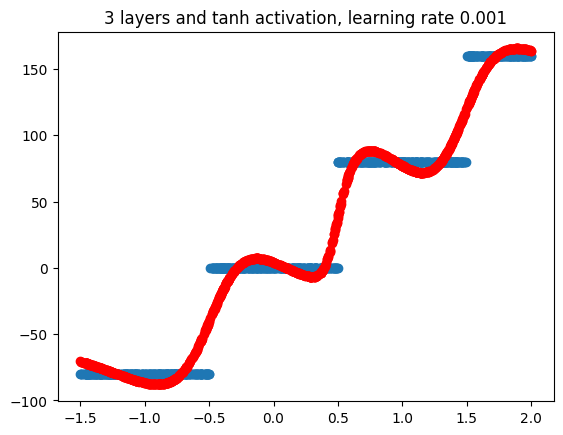

MSE for 3 layers and tanh activation, 
learning rate 0.001: 158.38069590872846


In [15]:
activation = "tanh"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons), input=train[["x"]].T, verbose=False)
    losses = mlp.train(train[["x"]].to_numpy().T, train[["y"]].to_numpy().T, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    y_hat = mlp.predict(test[["x"]].to_numpy().T)
    plt.scatter(steps_test["x"], steps_test["y"])
    plt.scatter(steps_test["x"], norm.denorm(y_hat.T, index="y"), color="red")
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print(f"MSE for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.mean((steps_test[["y"]].to_numpy().T - norm.denorm(y_hat, index="y"))**2))

# classification problems

## rings3

In [16]:
norm = networks.assets.Normalizator(rings3_train[['x', 'y']])
train = norm(rings3_train[["x", "y"]])
y_train = rings3_train[["c"]].to_numpy().T
test = norm(rings3_test[["x", "y"]])
y_test = rings3_test[["c"]].to_numpy().T

In [17]:
rings3_train[["x", "y"]]

x          y
0    -93.563317 -76.345110
1      1.060114 -16.727040
2     24.396099  40.358822
3    -94.595137 -97.889250
4    -85.331382 -56.736933
...         ...        ...
1495  -3.227585 -69.846357
1496 -82.598085 -51.758017
1497 -46.601078 -21.654871
1498 -59.106450 -44.528442
1499 -45.502025 -30.420834

[1500 rows x 2 columns]

Text(0.5, 1.0, 'True classes')

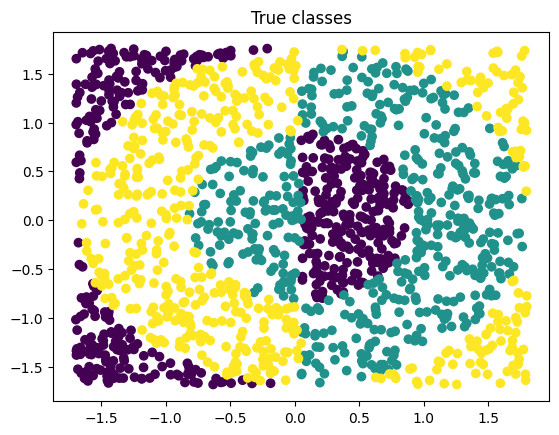

In [18]:
plt.scatter(train["x"], train["y"], c=y_train)
plt.title("True classes")

In [19]:
layers(activation, num_layer, neurons, output_type="classification", output_dim=3)

[{'output_dim': 10, 'activation': 'tanh', 'init': 'xavier'},
 {'output_dim': 10, 'activation': 'tanh', 'init': 'xavier'},
 {'output_dim': 10, 'activation': 'tanh', 'init': 'xavier'},
 {'output_dim': 3,
  'output_type': 'classification',
  'activation': 'softmax',
  'init': 'normal'}]

In [20]:
y_train.shape

(1, 1500)

In [21]:
y_hat

array([[ 1.62482852, -1.04881168, -1.18718783,  0.75931741, -1.16520216,
         0.58397856, -0.64264438, -1.16409459, -1.28536529, -1.3301742 ,
        -1.1751272 , -1.18479312,  0.30047558,  1.25007729, -0.13554275,
        -0.27728635, -1.34852373,  0.64859781,  1.71101562, -1.20831348,
         1.66750333,  0.02632451, -0.96096764,  1.7153703 ,  1.5927214 ,
        -1.33473649, -1.30891806,  0.6799766 , -0.05046023,  0.93311236,
         1.70777383, -1.20265803,  0.85189827,  0.66457695, -0.27861918,
         0.70726449, -1.15777242, -0.22011496,  0.58704368,  1.65442584,
        -1.31524602,  0.39884069,  1.71161428, -0.20324393,  1.57285357,
        -0.29525448,  0.78311784, -1.32902987,  1.64245864,  0.61248699,
        -1.22442355, -0.41540394,  1.71032314, -0.32673752,  1.70515176,
         0.70919003,  1.47689517, -0.36616881,  0.73263061, -1.22825788,
        -1.29960061,  0.62959532, -0.49603629, -0.63285843, -0.3048547 ,
        -1.29675101,  1.61031376, -0.26245611, -1.1

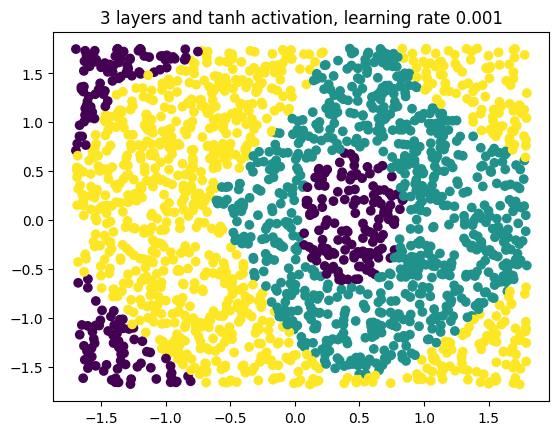

Fscore for 3 layers and tanh activation, 
learning rate 0.001: 0.7771986248934009
Accuracy for 3 layers and tanh activation, 
learning rate 0.001: 1743.0


In [22]:
mlp = networks.MLP(layers(activation, num_layer, neurons, output_type="classification", output_dim=3), input=train.T, verbose=False, output_type="classification")
losses = mlp.train(train.to_numpy().T, y_train, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

y_pred = mlp.full_forward_pass(test.T)
y_hat = mlp.predict(test.T)
y_test_onehot = networks.assets.one_hot(y_test, 3)

plt.scatter(test["x"], test["y"], c=y_hat)
plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
plt.show()
print(f"Fscore for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_pred, y_test_onehot))
print(f"Accuracy for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.sum(y_hat == y_test) / len(y_test))

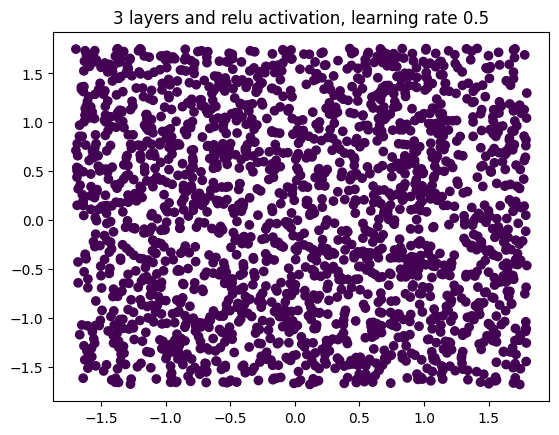

Fscore for 3 layers and relu activation, 
learning rate 0.5: 0.39847803114348584
Accuracy for 3 layers and relu activation, 
learning rate 0.5: 815.0


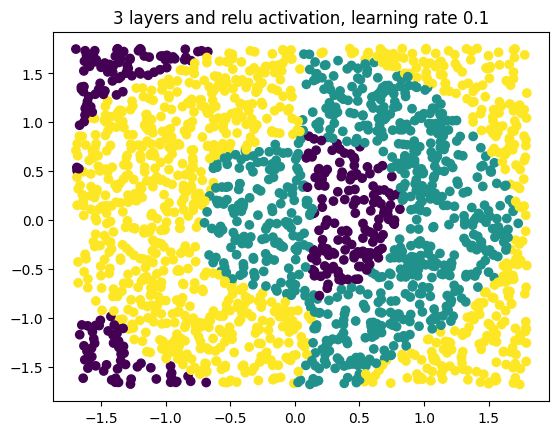

Fscore for 3 layers and relu activation, 
learning rate 0.1: 0.8735986747889883
Accuracy for 3 layers and relu activation, 
learning rate 0.1: 1751.0


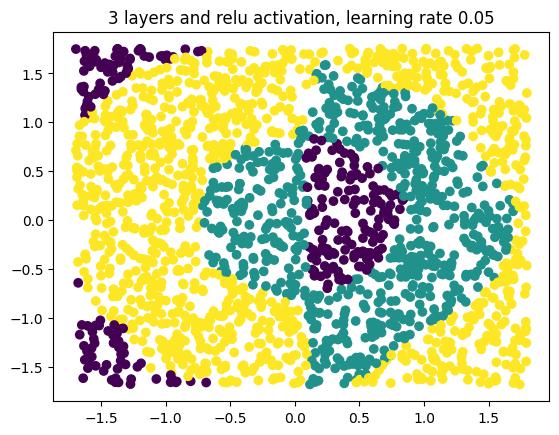

Fscore for 3 layers and relu activation, 
learning rate 0.05: 0.8381897791904919
Accuracy for 3 layers and relu activation, 
learning rate 0.05: 1684.0


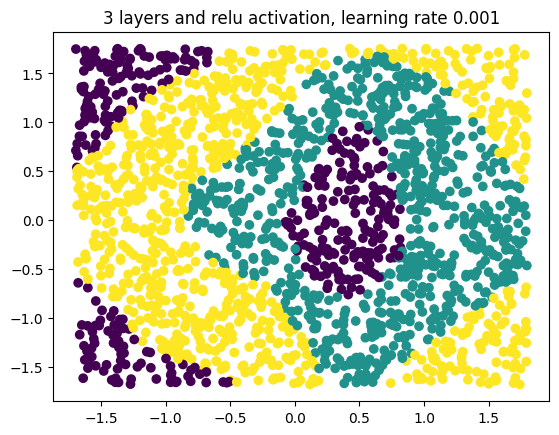

Fscore for 3 layers and relu activation, 
learning rate 0.001: 0.8331640634609289
Accuracy for 3 layers and relu activation, 
learning rate 0.001: 1830.0


In [25]:
activation = "relu"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons, output_type="classification", output_dim=3), input=train.T, verbose=False, output_type="classification")
    losses = mlp.train(train.to_numpy().T, y_train, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    y_pred = mlp.full_forward_pass(test.T)
    y_hat = mlp.predict(test.T)
    y_test_onehot = networks.assets.one_hot(y_test, 3)

    plt.scatter(test["x"], test["y"], c=y_hat)
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print(f"Fscore for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_pred, y_test_onehot))
    print(f"Accuracy for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.sum(y_hat == y_test) / len(y_test))

## rings5

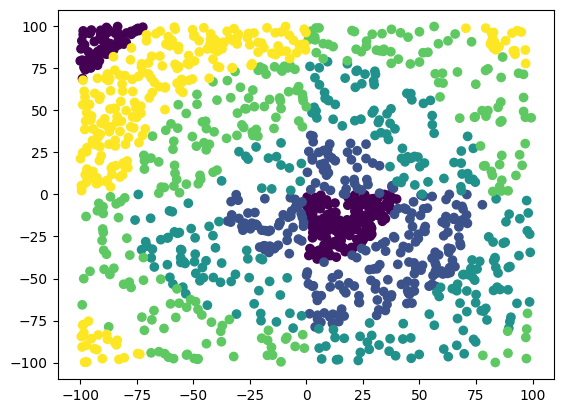

In [43]:
plt.scatter(rings5_train["x"], rings5_train["y"], c=rings5_train.c)

In [45]:
norm = networks.assets.Normalizator(rings5_train[['x', 'y']])
train = norm(rings5_train[["x", "y"]]).to_numpy().T
y_train = rings5_train[["c"]].to_numpy().T
test = norm(rings5_test[["x", "y"]])
y_test = rings5_test[["c"]].to_numpy().T

array([[3, 1, 4, ..., 3, 3, 2]], dtype=int64)

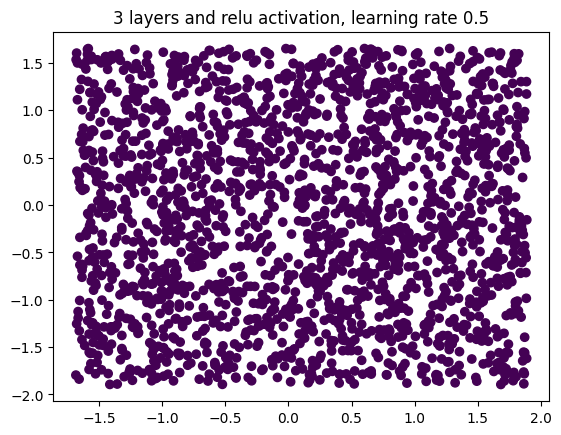

Fscore for 3 layers and relu activation, 
learning rate 0.5: 0.16516423770321187
Accuracy for 3 layers and relu activation, 
learning rate 0.5: 0.1255


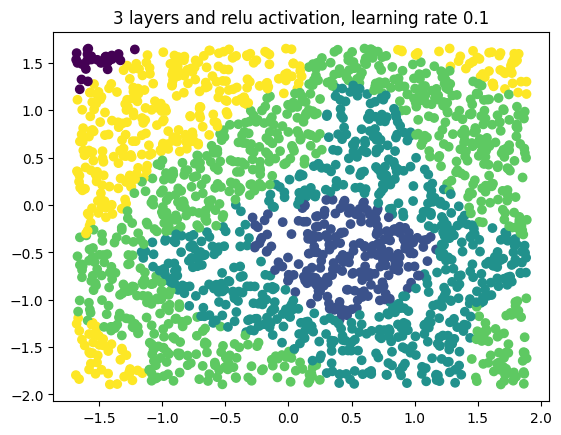

Fscore for 3 layers and relu activation, 
learning rate 0.1: 0.7111683659230237
Accuracy for 3 layers and relu activation, 
learning rate 0.1: 0.7185


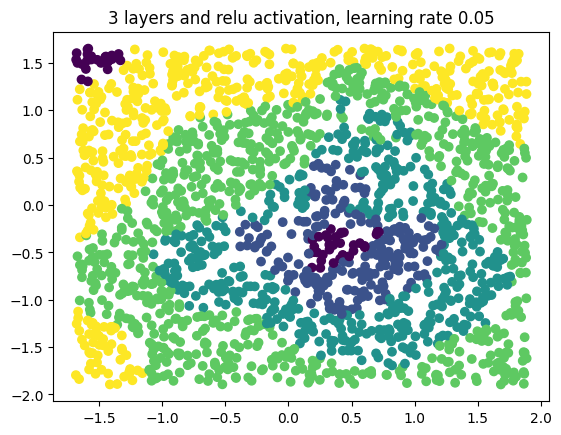

Fscore for 3 layers and relu activation, 
learning rate 0.05: 0.6443922411832578
Accuracy for 3 layers and relu activation, 
learning rate 0.05: 0.6405


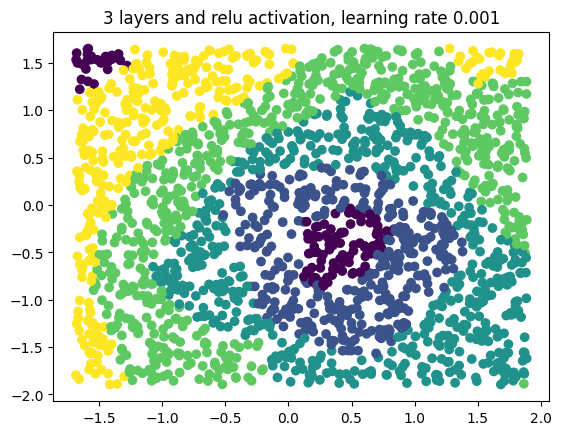

Fscore for 3 layers and relu activation, 
learning rate 0.001: 0.6582949083591978
Accuracy for 3 layers and relu activation, 
learning rate 0.001: 0.7865


In [54]:
activation = "relu"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons, output_type="classification", output_dim=5), input=train, verbose=False, output_type="classification")
    losses = mlp.train(train, y_train, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    y_pred = mlp.full_forward_pass(test.to_numpy().T)
    y_hat = mlp.predict(test.to_numpy().T)
    y_test_onehot = networks.assets.one_hot(y_test, 5)

    plt.scatter(test["x"], test["y"], c=y_hat)
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print(f"Fscore for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_pred, y_test_onehot))
    print(f"Accuracy for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.sum(y_hat == y_test.flatten()) / len(y_hat))

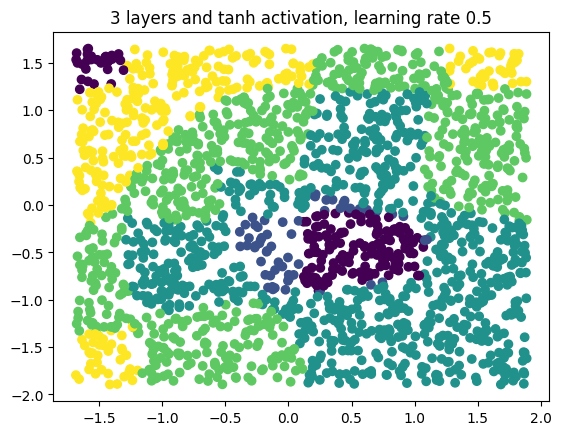

Fscore for 3 layers and tanh activation, 
learning rate 0.5: 0.712346856291284
Accuracy for 3 layers and tanh activation, 
learning rate 0.5: 0.7425


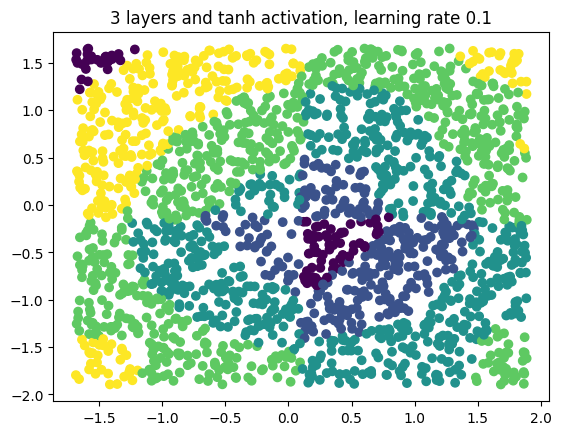

Fscore for 3 layers and tanh activation, 
learning rate 0.1: 0.8845540629170714
Accuracy for 3 layers and tanh activation, 
learning rate 0.1: 0.901


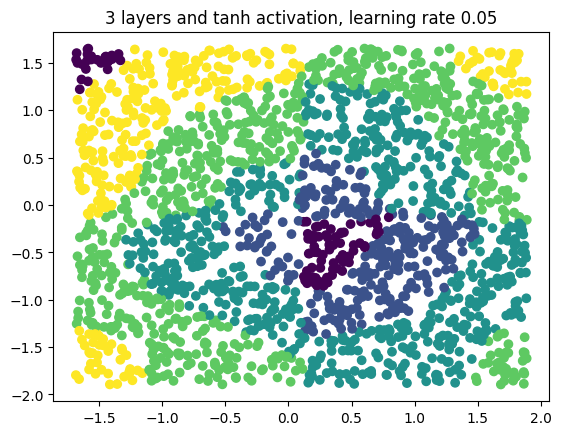

Fscore for 3 layers and tanh activation, 
learning rate 0.05: 0.8980914779348875
Accuracy for 3 layers and tanh activation, 
learning rate 0.05: 0.9105


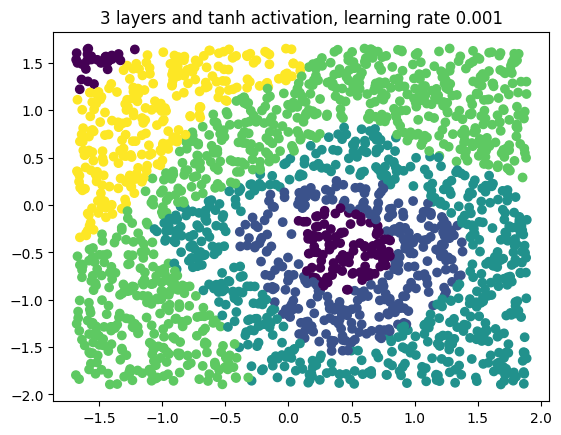

Fscore for 3 layers and tanh activation, 
learning rate 0.001: 0.5715743759522129
Accuracy for 3 layers and tanh activation, 
learning rate 0.001: 0.7695


In [55]:
activation = "tanh"

for learning_rate in learning_rates:
    mlp = networks.MLP(layers(activation, num_layer, neurons, output_type="classification", output_dim=5), input=train, verbose=False, output_type="classification")
    losses = mlp.train(train, y_train, max_epochs=max_epochs, learning_rate=learning_rate, plot_losses=False, verbose=False)

    y_pred = mlp.full_forward_pass(test.to_numpy().T)
    y_hat = mlp.predict(test.to_numpy().T)
    y_test_onehot = networks.assets.one_hot(y_test, 5)

    plt.scatter(test["x"], test["y"], c=y_hat)
    plt.title(f"{num_layer} layers and {activation} activation, learning rate {learning_rate}")
    plt.show()
    print(f"Fscore for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", mlp.Fscore(y_pred, y_test_onehot))
    print(f"Accuracy for {num_layer} layers and {activation} activation, \nlearning rate {learning_rate}:", np.sum(y_hat == y_test.flatten()) / len(y_hat))